# 911 Calls Capstone Project

For this capstone project, the data for some 911 call is obtained from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## 1. Data and Setup


** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## 2. Basic Questions

 ###   I. What are the top 5 zipcodes for 911 calls? 

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### II. What are the top 5 townships (twp) for 911 calls? 

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### III. Take a look at the 'title' column, how many unique title codes are there? 

In [8]:
df['title'].nunique()

110

## 3. Creating New Features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
df['Reasons']= df['title'].apply(lambda x: x.split(':')[0])

###  I. What is the most common Reason for a 911 call based off of this new column? 

In [10]:
df['Reasons'].value_counts().head(5)

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

### II.  Use seaborn to create a countplot of 911 calls by Reason. 

<AxesSubplot:xlabel='Reasons', ylabel='count'>

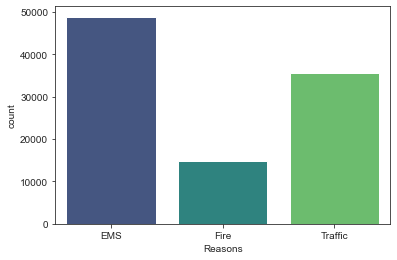

In [11]:
sns.set_style('ticks')
sns.countplot(x = 'Reasons', data = df, palette='viridis')


**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [12]:
type(df['timeStamp'].iloc[0])

str

** These timestamps are still strings. We can use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
time = df['timeStamp'].iloc[1]
time.hour

17

** We can grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**We can use Jupyter's tab method to explore the various attributes we can call. Now that the timestamp column are actually DateTime objects, we can use .apply() to create 3 new columns called Hour, Month, and Day of Week. 

In [15]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [16]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

In [17]:
df['Day of Week']= df['timeStamp'].apply(lambda x: x.dayofweek)

** Notice how the Day of Week is an integer 0-6. We can use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] =df['Day of Week'] .map(dmap)

### III.  Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. 

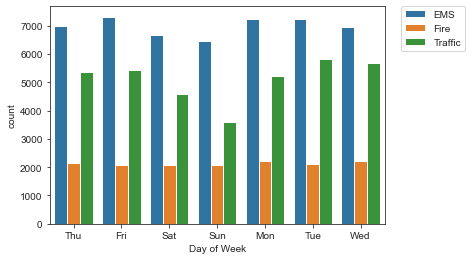

In [19]:
sns.countplot(x = 'Day of Week', data = df, hue = 'Reasons')
# Move the legend outside the box
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now we do the same for Month:**

<AxesSubplot:xlabel='Month', ylabel='count'>

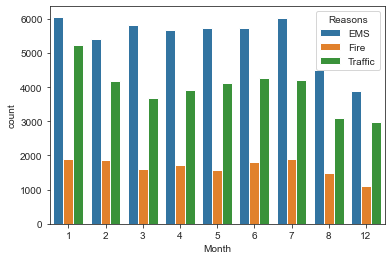

In [20]:
sns.countplot(x = 'Month', data = df, hue = 'Reasons')

**Did we notice something strange about the Plot?**

_____

** We noticed number of calls was missing for some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** We can  create a gropuby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation. **

In [21]:
byMonth = df.groupby('Month').count()

### VI. Now  we can create a simple plot off of the dataframe indicating the count of calls per month. 

In [22]:
byMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

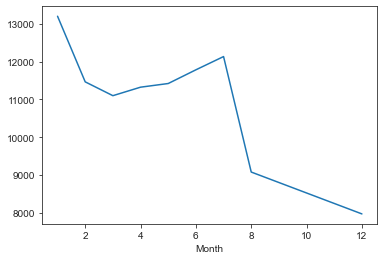

In [23]:
byMonth['lat'].plot() # any columns is equaal to number of calls


** Now Use seaborn's lmplot() to create a linear fit on the number of calls per month and reset the index to a column. **

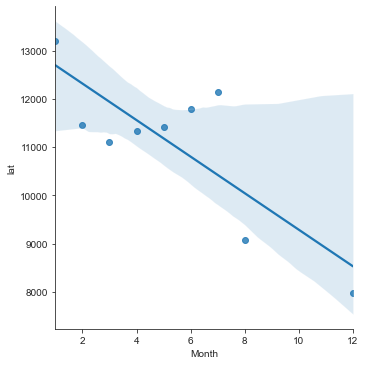

In [24]:
sns.lmplot(x = 'Month', y ='lat', data =byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. We'll need to use apply along with the .date() method. ** 

In [25]:
df['Date'] = df['timeStamp'].apply(lambda x : x.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [26]:
df['Date'].head(5)

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

In [27]:
byDate = df.groupby('Date').count()

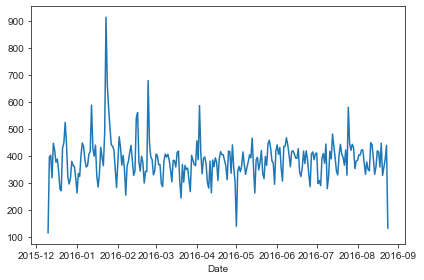

In [28]:
byDate['lat'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [29]:
byDate.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


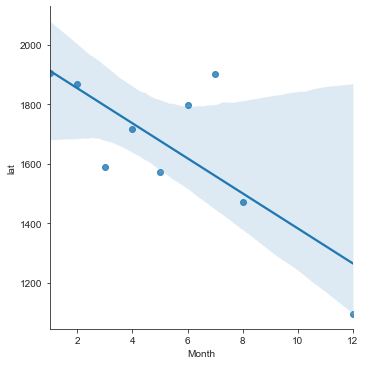

In [31]:
df1 = df[df['Reasons']=='Fire'].groupby('Month').count()
sns.lmplot(x = 'Month', y ='lat', data =df1.reset_index())


### V.  Explore how the number of calls for each reasons (Fire,Traffic and EMS) varies with hours of day?.

In [36]:
def plot_func (x,y,x_label,y_label,title,color):
    plt.plot(x_axis, y_axis, color) 
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)


In [ ]:
def xy_func (table,column_1,column_2,any_reason):
    df2 = table[table['Reasons']== any_reason].groupby(column_1).count().reset_index(column_1)
    x = df2[column_1]
    y = df2[column_2]
    return (x,y)

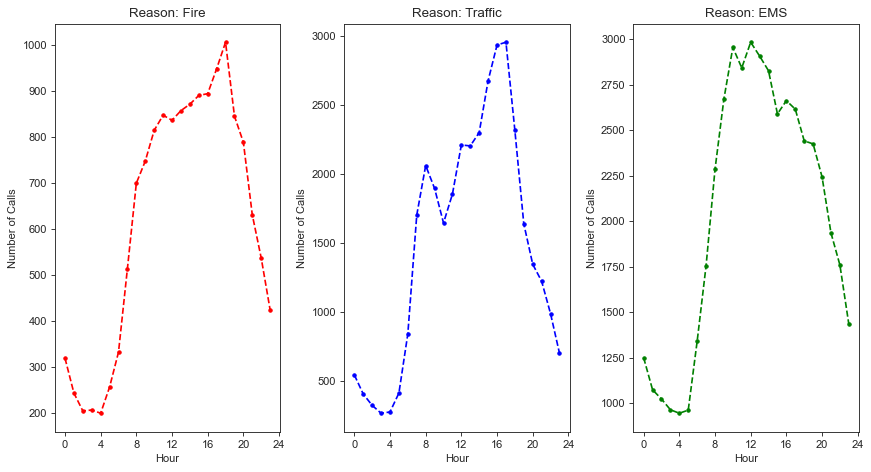

In [95]:
fig = plt.figure(figsize=(11,6), dpi=80)
for i in range (1,4):
    plt.subplot(1,3,i)
    plt.grid(False)
    plt.xticks(np.arange(0, 28, 4))
    if i==1:
        x_axis,y_axis = xy_func(df,'Hour','lat','Fire')
        plot_func (x_axis,y_axis,'Hour','Number of Calls','Reason: Fire','r.--') # 'r' is the color red
        
    elif i==2:
        x_axis,y_axis = xy_func(df,'Hour','lat','Traffic')
        plot_func (x_axis,y_axis,'Hour','Number of Calls','Reason: Traffic','b.--')

    else:
        x_axis,y_axis = xy_func (df,'Hour','lat','EMS')
        plot_func (x_axis,y_axis,'Hour','Number of Calls','Reason: EMS','g.--')

plt.tight_layout()
plt.show()


### VI.  Explore how the number of calls for each reasons (Fire,Traffic and EMS) varies with months?.

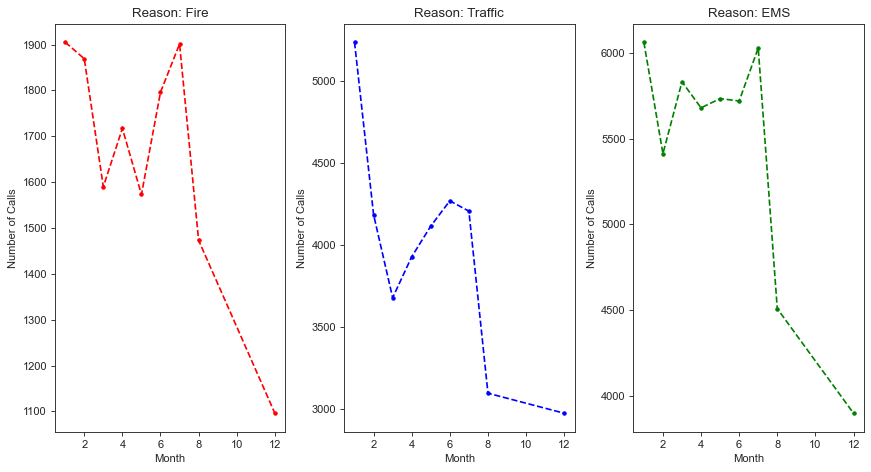

In [58]:
fig = plt.figure(figsize=(11,6), dpi=80)
for i in range (1,4):
    plt.subplot(1,3,i)
    plt.grid(False)
    plt.xticks(np.arange(0, 14, 2))
    if i==1:
        x_axis,y_axis = xy_func(df,'Month','lat','Fire')
        plot_func (x_axis,y_axis,'Month','Number of Calls','Reason: Fire','r.--')
        
    elif i==2:
        x_axis,y_axis = xy_func(df,'Month','lat','Traffic')
        plot_func (x_axis,y_axis,'Month','Number of Calls','Reason: Traffic','b.--')

    else:
        x_axis,y_axis = xy_func (df,'Month','lat','EMS')
        plot_func (x_axis,y_axis,'Month','Number of Calls','Reason: EMS','g.--')

plt.tight_layout()
plt.show()

### VII.  Explore how the number of calls for each reasons (Fire,Traffic and EMS) varies with hours of a day?.

In [ ]:
def xy_func1 (table,column_1,column_2,any_reason):
    df2 = table[table['Reasons']== any_reason].groupby(column_1).count().reindex(['Mon', 'Tue','Wed','Thu','Fri','Sat','Sun']).reset_index('Day of Week')
    x = df2[column_1]
    y = df2[column_2]
    return (x,y)

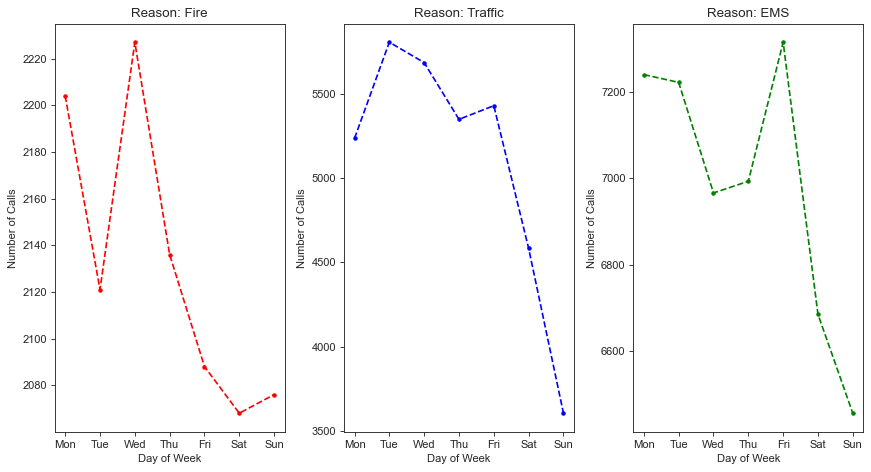

In [59]:
fig = plt.figure(figsize=(11,6), dpi=80)
for i in range (1,4):
    plt.subplot(1,3,i)
    plt.grid(False)
    if i==1:
        x_axis,y_axis = xy_func1(df,'Day of Week','lat','Fire')
        plot_func (x_axis,y_axis,'Day of Week','Number of Calls','Reason: Fire','r.--')
        
    elif i==2:
        x_axis,y_axis = xy_func1(df,'Day of Week','lat','Traffic')
        plot_func (x_axis,y_axis,'Day of Week','Number of Calls','Reason: Traffic','b.--')

    else:
        x_axis,y_axis = xy_func1 (df,'Day of Week','lat','EMS')
        plot_func (x_axis,y_axis,'Day of Week','Number of Calls','Reason: EMS','g.--')

plt.tight_layout()
plt.show()

### VIII.  Explore how the number of calls for each reasons (Fire,Traffic and EMS) varies with Dates?.

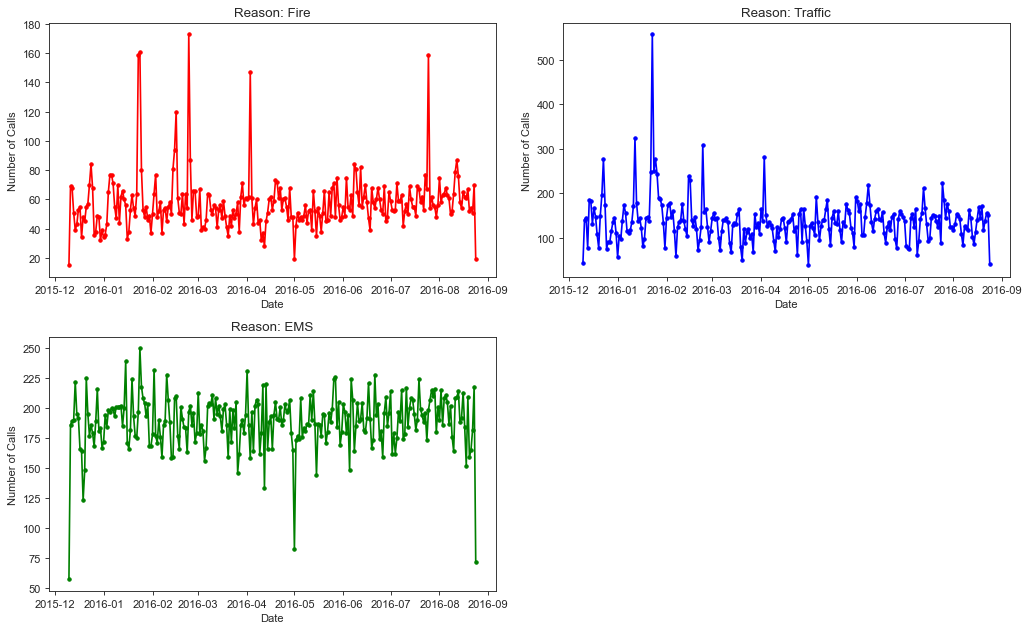

In [94]:
fig = plt.figure(figsize=(13,8), dpi=80)
for i in range (1,4):
    plt.subplot(2,2,i)
    plt.grid(False)
    if i==1:
        x_axis,y_axis = xy_func(df,'Date','lat','Fire')
        plot_func (x_axis,y_axis,'Date','Number of Calls','Reason: Fire','r.-')
        
    elif i==2:
        x_axis,y_axis = xy_func(df,'Date','lat','Traffic')
        plot_func (x_axis,y_axis,'Date','Number of Calls','Reason: Traffic','b.-')

    else:
        x_axis,y_axis = xy_func (df,'Date','lat','EMS')
        plot_func (x_axis,y_axis,'Date','Number of Calls','Reason: EMS','g.-')

plt.tight_layout()
plt.show()

### XI. Creating heatmaps with seaborn and our data


** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but we would combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html). ** 

In [34]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reasons'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

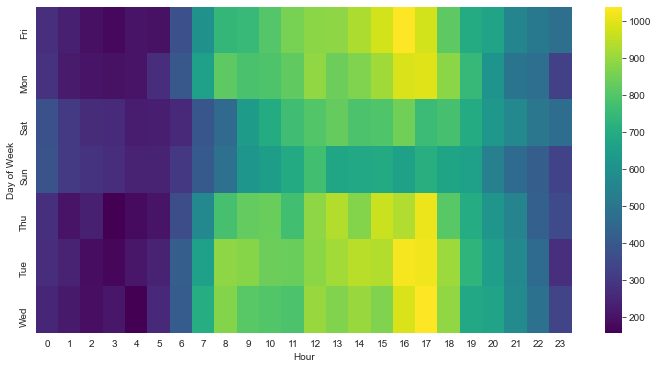

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

** Now create a clustermap using this DataFrame. **

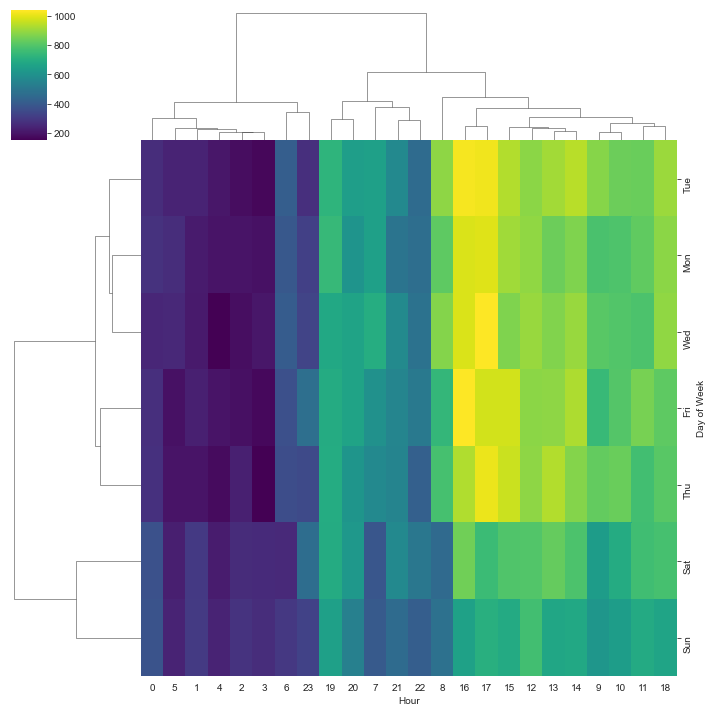

In [36]:
sns.clustermap(dayHour,cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [37]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reasons'].unstack()
dayMonth .head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

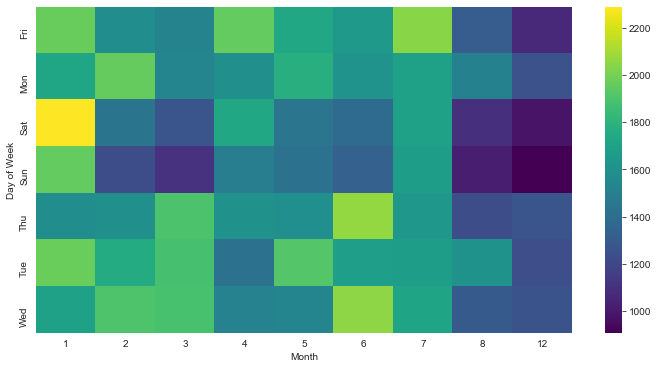

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

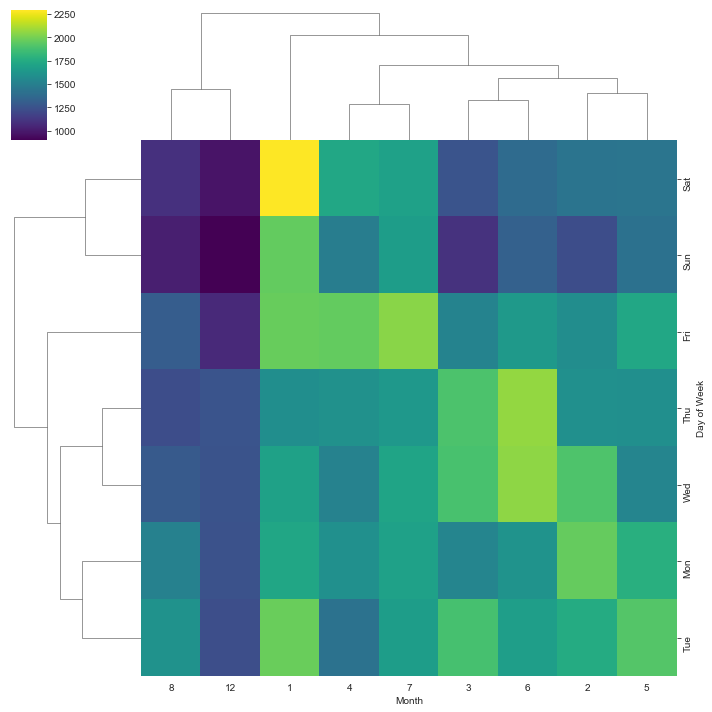

In [92]:
sns.clustermap(dayMonth,cmap='viridis')